<a href="https://colab.research.google.com/github/mariduff/DATASCIENCE_BI/blob/main/notebooks/Predicci%C3%B3n_puesto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nuevo cuaderno para hacer la predicción por puesto de trabajo a partir de ETL_clustering

In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd

ruta = '/content/drive/MyDrive/TFM/data/TTT.xlsx'
df = pd.read_excel(ruta)

print(df.head())


  Unnamed: 0 CD_CENTRO TEMPORALIDAD                     PUESTO  \
0 2023-01-01   CENTRO1   *No Aplica                 *No Aplica   
1 2023-01-01   CENTRO1   Indefinido  AUXILIAR ADMINISTRATIVO/A   
2 2023-01-01   CENTRO1   Indefinido          DIRECTOR/A CENTRO   
3 2023-01-01   CENTRO1   Indefinido                ENFERMERO/A   
4 2023-01-01   CENTRO1        Total                        NaN   

      ASISTENCIAL  No. Empleado  FTE Contratación  FTE Sin Absentismo  \
0  NO ASISTENCIAL           NaN               NaN                 NaN   
1  NO ASISTENCIAL           1.0          0.999998            0.999998   
2  NO ASISTENCIAL           1.0          0.999998            0.999998   
3     ASISTENCIAL           1.0          0.125085            0.108945   
4             NaN           3.0          2.125081            2.108941   

   FTE Absentismo  Plantilla Total Absentismo  ...  RdE  Vacaciones  \
0             NaN                         NaN  ...  NaN         NaN   
1             NaN     

In [38]:
print(df.columns.tolist())


['Unnamed: 0', 'CD_CENTRO', 'TEMPORALIDAD', 'PUESTO', 'ASISTENCIAL', 'No. Empleado', 'FTE Contratación', 'FTE Sin Absentismo', 'FTE Absentismo', 'Plantilla Total Absentismo', 'Acumulación Lactancia', 'AT / EP', 'Ausencia NO justificada', 'Días Asuntos Propios', 'EC / ANL', 'Horas Comité Seguridad', 'Horas sindicales', 'Huelga Parcial', 'Huelga Total', 'Maternidad', 'Paternidad', 'Permiso retribuido', 'Permiso sin sueldo', 'RdE', 'Vacaciones', 'Vacaciones año ant.', 'FTE reemplazo Vacaciones', 'CAPACIDAD', 'Ocupacion Media', 'Ocupacion Media Res', 'Ocupacion Media CD', 'Ocupacion facturada', 'RESIDENCIAL']


In [39]:
# Seleccionar las columnas que quieres conservar
columnas_deseadas = ['Unnamed: 0', 'PUESTO', 'FTE Contratación', 'EC / ANL']
df_filtrado = df[columnas_deseadas]

In [40]:
print(df_filtrado.head())

  Unnamed: 0                     PUESTO  FTE Contratación  EC / ANL
0 2023-01-01                 *No Aplica               NaN       NaN
1 2023-01-01  AUXILIAR ADMINISTRATIVO/A          0.999998       NaN
2 2023-01-01          DIRECTOR/A CENTRO          0.999998       NaN
3 2023-01-01                ENFERMERO/A          0.125085   0.01614
4 2023-01-01                        NaN          2.125081   0.01614


In [41]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_').str.lower()


In [42]:
print(df_filtrado.columns.tolist())

['Unnamed: 0', 'PUESTO', 'FTE Contratación', 'EC / ANL']


In [43]:
# Renombrar la columna 'Unnamed: 0' a 'FECHA'
df_filtrado.rename(columns={'Unnamed: 0': 'FECHA'}, inplace=True)

/tmp/ipython-input-3528525421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.rename(columns={'Unnamed: 0': 'FECHA'}, inplace=True)


In [44]:
print(df_filtrado.head())

       FECHA                     PUESTO  FTE Contratación  EC / ANL
0 2023-01-01                 *No Aplica               NaN       NaN
1 2023-01-01  AUXILIAR ADMINISTRATIVO/A          0.999998       NaN
2 2023-01-01          DIRECTOR/A CENTRO          0.999998       NaN
3 2023-01-01                ENFERMERO/A          0.125085   0.01614
4 2023-01-01                        NaN          2.125081   0.01614


In [45]:
df_filtrado['EC/ANL relativo'] = df_filtrado['EC / ANL'] / df_filtrado['FTE Contratación']


/tmp/ipython-input-118287632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['EC/ANL relativo'] = df_filtrado['EC / ANL'] / df_filtrado['FTE Contratación']


In [46]:
print(df_filtrado.columns.tolist())

['FECHA', 'PUESTO', 'FTE Contratación', 'EC / ANL', 'EC/ANL relativo']


In [47]:
df_filtrado.drop(columns=['FTE Contratación', 'EC / ANL'], inplace=True)


/tmp/ipython-input-2220851330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.drop(columns=['FTE Contratación', 'EC / ANL'], inplace=True)


In [48]:
print(df_filtrado.columns.tolist())

['FECHA', 'PUESTO', 'EC/ANL relativo']


In [49]:
print(df_filtrado.head())

       FECHA                     PUESTO  EC/ANL relativo
0 2023-01-01                 *No Aplica              NaN
1 2023-01-01  AUXILIAR ADMINISTRATIVO/A              NaN
2 2023-01-01          DIRECTOR/A CENTRO              NaN
3 2023-01-01                ENFERMERO/A         0.129032
4 2023-01-01                        NaN         0.007595


In [50]:
df_filtrado = df_filtrado[df_filtrado['PUESTO'].notna() & (df_filtrado['PUESTO'] != '*No Aplica')]


In [51]:
print(df_filtrado.head())

       FECHA                     PUESTO  EC/ANL relativo
1 2023-01-01  AUXILIAR ADMINISTRATIVO/A              NaN
2 2023-01-01          DIRECTOR/A CENTRO              NaN
3 2023-01-01                ENFERMERO/A         0.129032
6 2023-01-01        ASISTENTE DIRECCION              NaN
7 2023-01-01     AUXILIAR MANTENIMIENTO              NaN


In [52]:
# Ver el número de registros por puesto
print(df_filtrado['PUESTO'].value_counts())


PUESTO
LIMPIADOR/A                         7476
ENFERMERO/A                         6404
COCINERO/A                          6102
RECEPCIONISTA                       6038
GEROCULTOR/A                        5666
                                    ... 
TECNICO/A PLANIFICACION                2
AUXILIAR DE SERVICIOS HOSTELEROS       1
AUXILIAR CD/ SUPERVISORA               1
ASISTENTE                              1
MEDICO EN RED ZONA NORTE               1
Name: count, Length: 159, dtype: int64


In [53]:
df_filtrado = df_filtrado[df_filtrado['PUESTO'] != 'AUXILIAR CENTRO DE DIA']


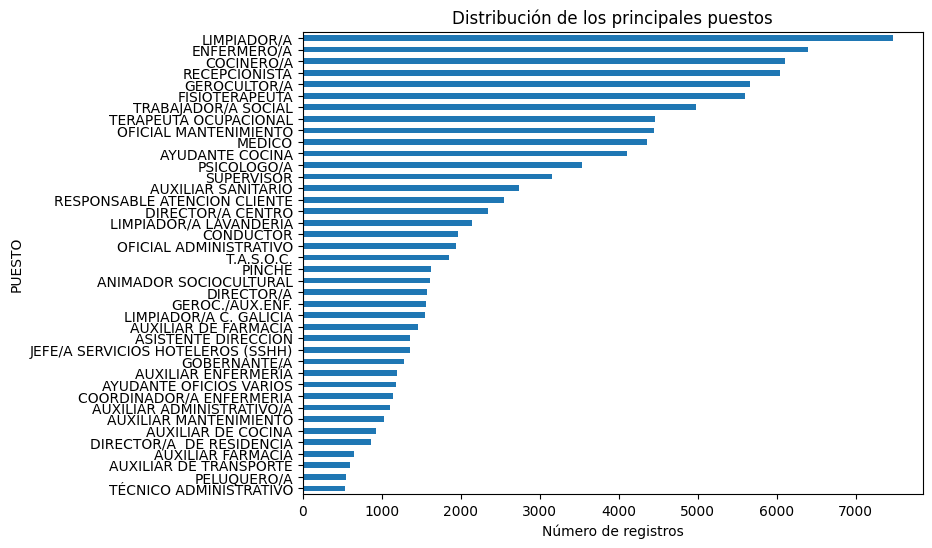

In [54]:
import matplotlib.pyplot as plt

df_filtrado['PUESTO'].value_counts().head(40).plot(kind='barh', figsize=(8,6))
plt.xlabel('Número de registros')
plt.ylabel('PUESTO')
plt.title('Distribución de los principales puestos')
plt.gca().invert_yaxis()
plt.show()


In [55]:
top_40 = df_filtrado['PUESTO'].value_counts().head(40).index
df_filtrado = df_filtrado[df_filtrado['PUESTO'].isin(top_40)]


In [58]:
df_filtrado.to_excel('/content/drive/MyDrive/TFM/data/processed/ETL_analisis_puesto_filtrado_top40.xlsx', index=False)


In [59]:
df_filtrado['FECHA'] = pd.to_datetime(df_filtrado['FECHA'])


In [60]:
serie = df_filtrado.groupby('FECHA')['EC/ANL relativo'].mean()


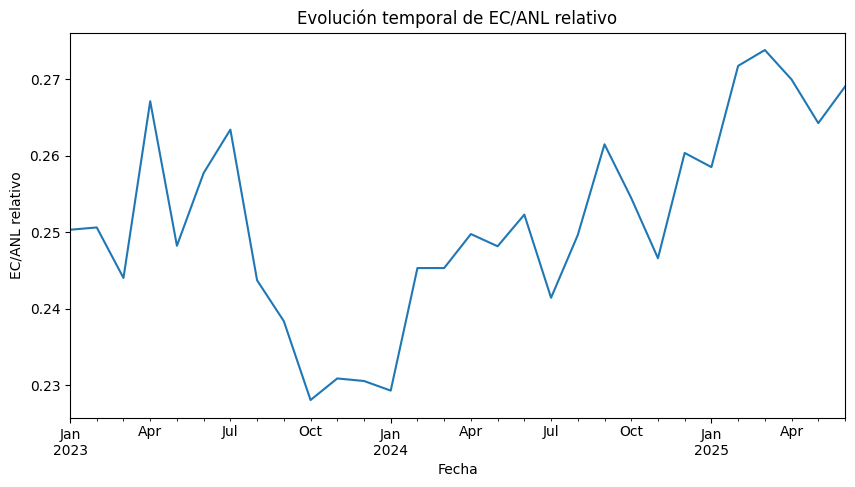

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
serie.plot()
plt.title(f"Evolución temporal de EC/ANL relativo")
plt.xlabel('Fecha')
plt.ylabel('EC/ANL relativo')
plt.show()


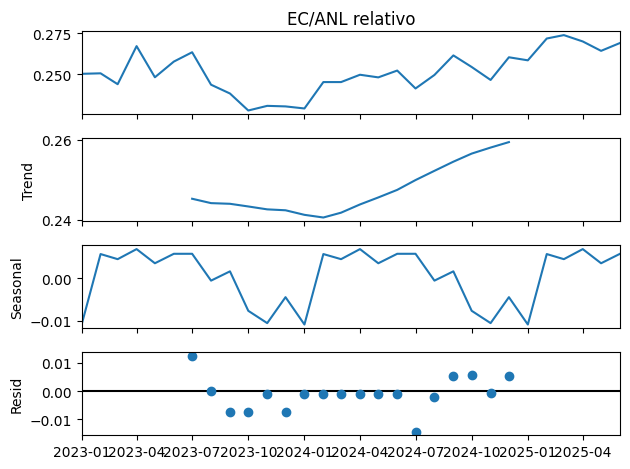

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

resultado = seasonal_decompose(serie, model='additive', period=12)  # ajusta period si tus datos no son mensuales
resultado.plot()
plt.show()


In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_filtrado['PUESTO_cod'] = le.fit_transform(df_filtrado['PUESTO'])


In [72]:
relacion_puestos = pd.DataFrame({
    'PUESTO': le.classes_,
    'PUESTO_cod': range(len(le.classes_))
})

print(relacion_puestos)


                               PUESTO  PUESTO_cod
0              ANIMADOR SOCIOCULTURAL           0
1                 ASISTENTE DIRECCION           1
2           AUXILIAR ADMINISTRATIVO/A           2
3                  AUXILIAR DE COCINA           3
4                AUXILIAR DE FARMACIA           4
5              AUXILIAR DE TRANSPORTE           5
6                 AUXILIAR ENFERMERÍA           6
7                   AUXILIAR FARMACIA           7
8              AUXILIAR MANTENIMIENTO           8
9                  AUXILIAR SANITARIO           9
10                    AYUDANTE COCINA          10
11            AYUDANTE OFICIOS VARIOS          11
12                         COCINERO/A          12
13                          CONDUCTOR          13
14           COORDINADOR/A ENFERMERIA          14
15                         DIRECTOR/A          15
16          DIRECTOR/A  DE RESIDENCIA          16
17                  DIRECTOR/A CENTRO          17
18                        ENFERMERO/A          18


Exportamos la relacion puesto - código que luego nos servirá como tabla de dimensiones

In [73]:
relacion_puestos.sort_values('PUESTO').to_excel('/content/drive/MyDrive/TFM/data/relacion_puestos_codigos.xlsx', index=False)


In [70]:
df_filtrado['EC/ANL relativo'] = (
    df_filtrado.groupby('PUESTO')['EC/ANL relativo']
    .transform(lambda x: x.fillna(x.mean()))
)


In [71]:
df_filtrado['EC/ANL relativo'] = df_filtrado['EC/ANL relativo'].fillna(df_filtrado['EC/ANL relativo'].mean())


In [74]:
import pandas as pd

# Asegurar formato fecha
df_filtrado['FECHA'] = pd.to_datetime(df_filtrado['FECHA'])

# Crear variables de tiempo
df_filtrado['AÑO'] = df_filtrado['FECHA'].dt.year
df_filtrado['MES'] = df_filtrado['FECHA'].dt.month


In [75]:
X = df_filtrado[['PUESTO_cod', 'AÑO', 'MES']]
y = df_filtrado['EC/ANL relativo']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(n_estimators=200, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 0.0414185842962863
R²: 0.6789487391027869


Generamos los resultados de Random Forest


In [81]:
import numpy as np
import pandas as pd

futuro = pd.DataFrame({
    'PUESTO_cod': np.repeat(df_filtrado['PUESTO_cod'].unique(), 6),
    'AÑO': 2025,
    'MES': list(range(7, 13)) * len(df_filtrado['PUESTO_cod'].unique())
})

futuro['EC/ANL relativo (pred)'] = modelo.predict(futuro)
futuro['PUESTO'] = le.inverse_transform(futuro['PUESTO_cod'])

futuro.to_excel('/content/drive/MyDrive/TFM/data/processed/predicciones_RF_puestos_2025.xlsx', index=False)


/tmp/ipython-input-2792155442.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab10', len(puestos_mostrar))
/tmp/ipython-input-2792155442.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['FECHA'] = pd.to_datetime(df_pred['AÑO'].astype(str) + '-' + df_pred['MES'].astype(str) + '-01')
/tmp/ipython-input-2792155442.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

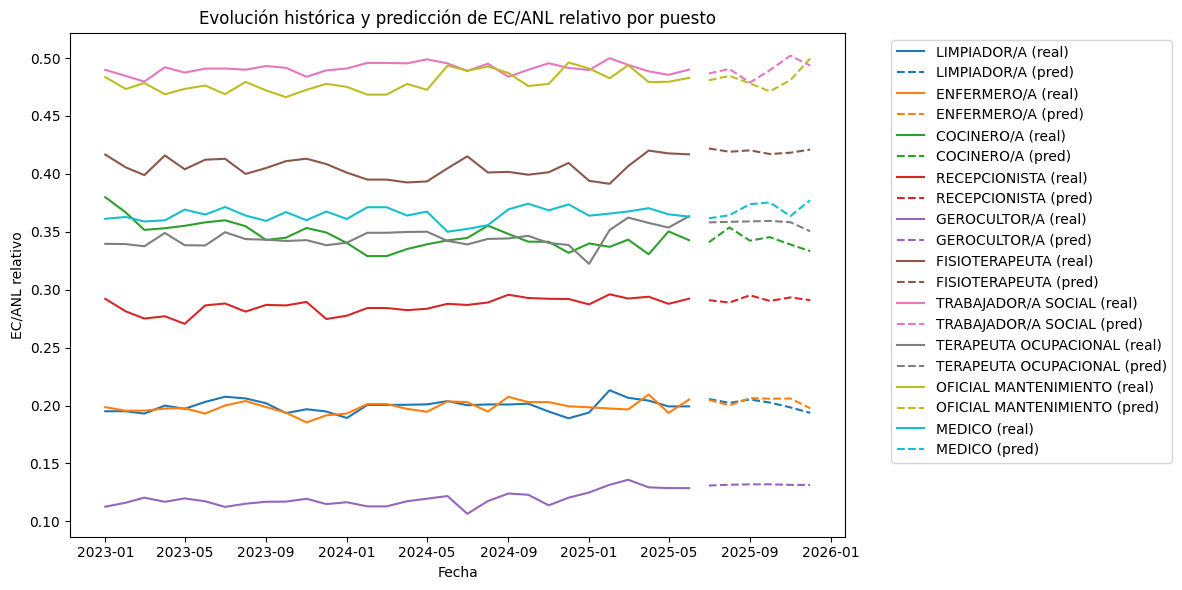

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Elegir los 10 puestos más frecuentes
puestos_mostrar = df_filtrado['PUESTO'].value_counts().head(10).index.tolist()

# Asignar un color único a cada puesto
colores = plt.cm.get_cmap('tab10', len(puestos_mostrar))
color_dict = {puesto: colores(i) for i, puesto in enumerate(puestos_mostrar)}

plt.figure(figsize=(12, 6))

for puesto in puestos_mostrar:
    color = color_dict[puesto]

    # Histórico
    df_real = df_filtrado[df_filtrado['PUESTO'] == puesto]
    df_real = df_real.groupby('FECHA')['EC/ANL relativo'].mean().reset_index()

    # Predicciones
    df_pred = futuro[futuro['PUESTO'] == puesto]
    df_pred['FECHA'] = pd.to_datetime(df_pred['AÑO'].astype(str) + '-' + df_pred['MES'].astype(str) + '-01')

    # Dibujar líneas
    plt.plot(df_real['FECHA'], df_real['EC/ANL relativo'], color=color, label=f'{puesto} (real)')
    plt.plot(df_pred['FECHA'], df_pred['EC/ANL relativo (pred)'], linestyle='--', color=color, label=f'{puesto} (pred)')

plt.title('Evolución histórica y predicción de EC/ANL relativo por puesto')
plt.xlabel('Fecha')
plt.ylabel('EC/ANL relativo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Vamos a ver ahora qué tal la predicción con XGBoost

In [82]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

modelo_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

modelo_xgb.fit(X_train, y_train)
y_pred_xgb = modelo_xgb.predict(X_test)

print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost MAE: 0.03813525662146042
XGBoost R²: 0.6836694302255097


Con GradientBoostingRegressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

modelo_gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

modelo_gb.fit(X_train, y_train)
y_pred_gb = modelo_gb.predict(X_test)

print("Gradient Boosting MAE:", mean_absolute_error(y_test, y_pred_gb))
print("Gradient Boosting R²:", r2_score(y_test, y_pred_gb))


Gradient Boosting MAE: 0.0412540441591858
Gradient Boosting R²: 0.6802763578617425


Comparamos modelos de Random Forest y XGBoost

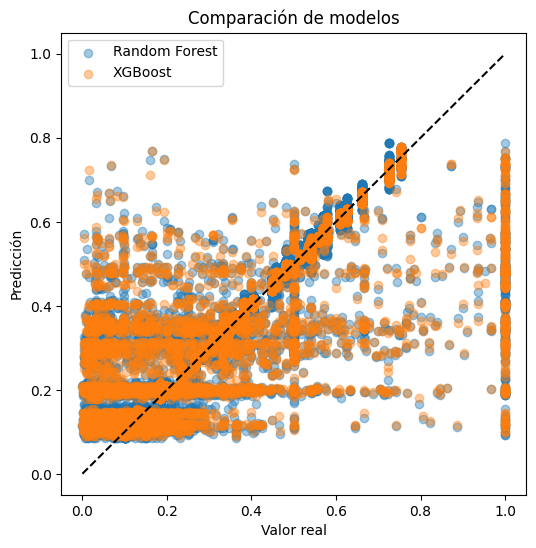

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4, label='Random Forest')
plt.scatter(y_test, y_pred_xgb, alpha=0.4, label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.legend()
plt.title('Comparación de modelos')
plt.show()


In [85]:
# Predicciones futuras (usando el DataFrame 'futuro' que ya tienes)
futuro['EC/ANL relativo (pred)'] = modelo_xgb.predict(futuro[['PUESTO_cod', 'AÑO', 'MES']])


/tmp/ipython-input-463330482.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab10', len(puestos_mostrar))


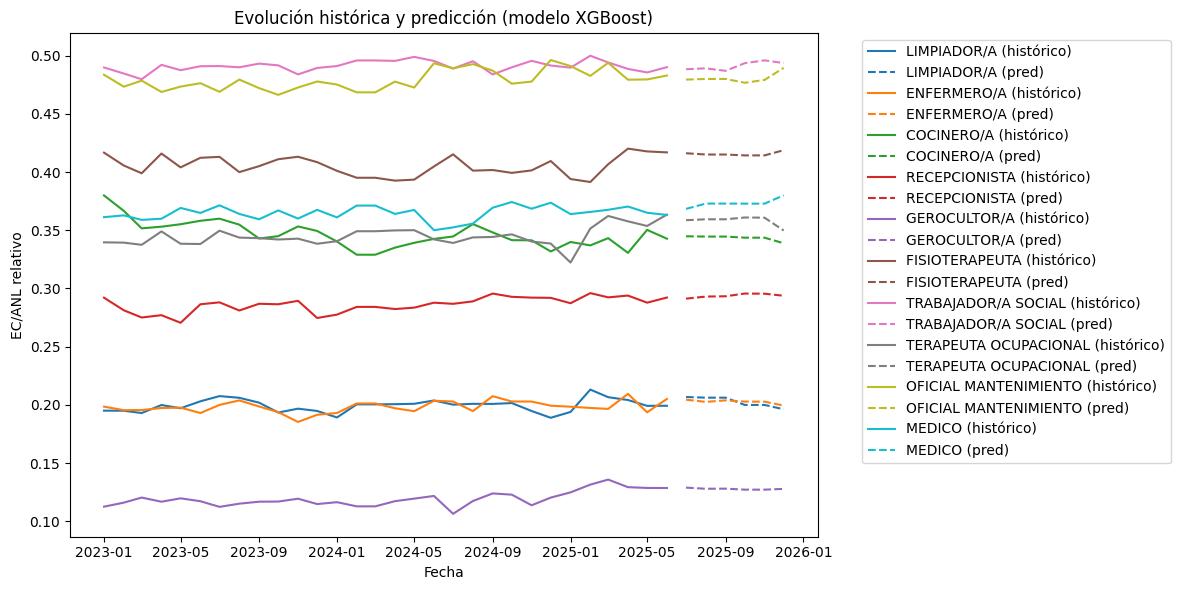

In [86]:
import matplotlib.pyplot as plt

# Elegir los 10 puestos más frecuentes
puestos_mostrar = df_filtrado['PUESTO'].value_counts().head(10).index.tolist()

# Asignar color fijo por puesto
colores = plt.cm.get_cmap('tab10', len(puestos_mostrar))
color_dict = {puesto: colores(i) for i, puesto in enumerate(puestos_mostrar)}

plt.figure(figsize=(12, 6))

for puesto in puestos_mostrar:
    color = color_dict[puesto]

    # Histórico
    df_real = df_filtrado[df_filtrado['PUESTO'] == puesto]
    df_real = df_real.groupby('FECHA')['EC/ANL relativo'].mean().reset_index()

    # Predicción XGBoost
    df_pred = futuro[futuro['PUESTO'] == puesto].copy()
    df_pred['FECHA'] = pd.to_datetime(df_pred['AÑO'].astype(str) + '-' + df_pred['MES'].astype(str) + '-01')

    # Gráficos
    plt.plot(df_real['FECHA'], df_real['EC/ANL relativo'], color=color, label=f'{puesto} (histórico)')
    plt.plot(df_pred['FECHA'], df_pred['EC/ANL relativo (pred)'], linestyle='--', color=color, label=f'{puesto} (pred)')

plt.title('Evolución histórica y predicción (modelo XGBoost)')
plt.xlabel('Fecha')
plt.ylabel('EC/ANL relativo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Guardamos la predicción de XGBoost que nos valdrá para el cuadro de mando

In [87]:
# Guardar resultados en Excel
futuro.to_excel('/content/drive/MyDrive/TFM/data/processed/predicciones_XGBoost_puestos_2025.xlsx', index=False)

